In [ ]:
import numpy as np

# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# x의 평균값을 구합니다.
mx = np.mean(x)

# y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모: ", divisor)
print("분자: ", dividend)

# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a = ", a)
print("y 절편 b = ", b)

x의 평균값:  5.0
y의 평균값:  90.5
분모:  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


In [ ]:
# 평균제곱오차
# 점수 y,x 공부시간
def mse(y,y_pred):
  error = y - (x*a+b) # 실제 점수 - 예상점수
  return np.mean(error**2)

mse(y,x*a+b)

8.299999999999985

In [ ]:
import numpy as np
# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a = 3
fake_b = 76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# y = ax + b에 가상의 a 값과 b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입해 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))
    
# 평균 제곱 오차 함수를 각 y 값에 대입해 최종 값을 구하는 함수입니다.
n = len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y, predict_result)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
평균 제곱 오차: 11.0


In [ ]:
y, x*a+b

(array([81, 93, 91, 97]), array([83.6, 88.2, 92.8, 97.4]))

In [ ]:
np.mean((y-(x*a+b))**2)

8.299999999999985

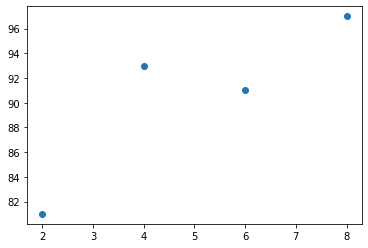

epoch=1451, 기울기=2.3000, 절편=78.9999
epoch=1452, 기울기=2.3000, 절편=78.9999
epoch=1453, 기울기=2.3000, 절편=78.9999
epoch=1454, 기울기=2.3000, 절편=78.9999
epoch=1455, 기울기=2.3000, 절편=78.9999
epoch=1456, 기울기=2.3000, 절편=79.0000
epoch=1457, 기울기=2.3000, 절편=79.0000
epoch=1458, 기울기=2.3000, 절편=79.0000
epoch=1459, 기울기=2.3000, 절편=79.0000
epoch=1460, 기울기=2.3000, 절편=79.0000


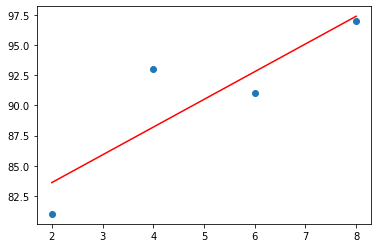

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 1461 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i > 1450:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

In [ ]:
# 경사하강법 한줄식 테스트

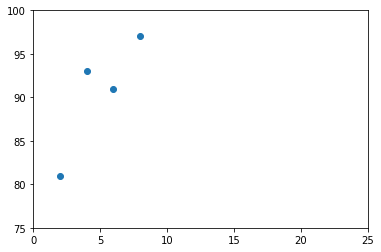

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.ylim(75,100)
plt.xlim(0,25)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0   # 목표 2.3
b = 0   # 목표 79

mse =  8.300000000414085
epoch=2000, 기울기=2.3000, 절편=79.0000


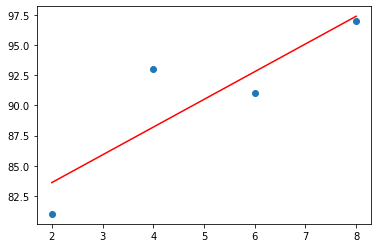

In [ ]:

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001    # 학습단위

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
# 평균제곱오차값 계산
mse = np.mean((y-(a*x+b))**2)
print('mse = ', mse)

# y_pred = a * x + b       # 예측 값을 구하는 식입니다.
error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
    
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      


# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()